In [1]:
import pandas as pd
import seaborn as sns


In [2]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score


In [3]:
import os

df = pd.read_csv(os.getcwd() + "/diabetes.csv")


In [4]:
df


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


<AxesSubplot: >

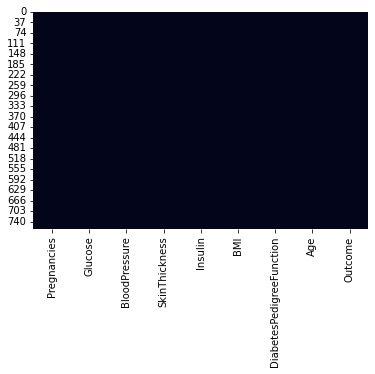

In [5]:
sns.heatmap(df.isnull(), cbar=False)


In [6]:
df_corr = df.corr()
df.keys


<bound method NDFrame.keys of      Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  Outcome  
0                       0.627   50 

In [7]:
corr_target = abs(df_corr['Outcome'])
features = corr_target[corr_target >= 0.10]
features = features.keys()
features


Index(['Pregnancies', 'Glucose', 'Insulin', 'BMI', 'DiabetesPedigreeFunction',
       'Age', 'Outcome'],
      dtype='object')

In [8]:
X = df[features]


In [9]:
X = X.drop("Outcome", axis=1)


In [10]:
X.head()


,Pregnancies,Glucose,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,0,33.6,0.627,50
1,1,85,0,26.6,0.351,31
2,8,183,0,23.3,0.672,32
3,1,89,94,28.1,0.167,21
4,0,137,168,43.1,2.288,33


In [11]:
y = df['Outcome']


In [12]:
X_train , X_test , y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [13]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier

from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt


In [14]:
accuracys = []
recalls = []
precisions = []
f1_scores = []
errors = []
cf_matrix = []
fpers = []
tpers = []


In [15]:
def process(clf, X_train=X_train, X_test=X_test, y_train=y_train, y_test=y_test):

    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    confusion = confusion_matrix(y_test, y_pred)
    # accuracy = zero_one_score(y_test, y_pred)
    error_rate = 1 - accuracy

    error = 1 - accuracy
    precision = confusion[0][0]/(confusion[0][0] + confusion[1][0]) * 100
    recall = confusion[0][0]/(confusion[0][0] + confusion[0][1]) * 100
    f1_score = ((2 * precision * recall) / (precision + recall)) / 100

    probs = clf.predict_proba(X_test)
    probs = probs[:, 1]
    fper, tper, _ = roc_curve(y_test, probs)

    fpers.append(fper)
    tpers.append(tper)
    accuracys.append(accuracy)
    recalls.append(recall)
    errors.append(error)
    precisions.append(precision)
    f1_scores.append(f1_score)
    cf_matrix.append(confusion)



In [16]:
algo = [
    KNeighborsClassifier(n_neighbors=3),
    DecisionTreeClassifier(),
    MultinomialNB(force_alpha=True),
    SVC(gamma=0.01, probability=True),
    RandomForestClassifier(),
    AdaBoostClassifier(),
    GradientBoostingClassifier(),
]
algos = [
    "KNN",
    "Decision Tree",
    "Naive Bayes",
    "SVM",
    "Random Forest",
    "Ada Boost",
    "Gradient Boosting",
]


In [17]:
for clf in algo:
    process(clf)


In [18]:
Metric = pd.DataFrame({
    'Algorithm': algos,
    "Error rate": errors,
    'Accuracy': accuracys,
    'Recall': recalls,
    'Precision': precisions,
    'F1_score': f1_scores
})
Metric


,Algorithm,Error rate,Accuracy,Recall,Precision,F1_score
0,KNN,0.331169,0.668831,69.696970,76.666667,0.730159
1,Decision Tree,0.259740,0.740260,72.727273,84.705882,0.782609
2,Naive Bayes,0.350649,0.649351,77.777778,70.642202,0.740385
3,SVM,0.318182,0.681818,83.838384,71.551724,0.772093
4,Random Forest,0.240260,0.759740,78.787879,82.978723,0.808290
5,Ada Boost,0.272727,0.727273,79.797980,78.217822,0.790000
6,Gradient Boosting,0.253247,0.746753,77.777778,81.914894,0.797927


In [19]:
import seaborn as sns
import matplotlib.pyplot as plt


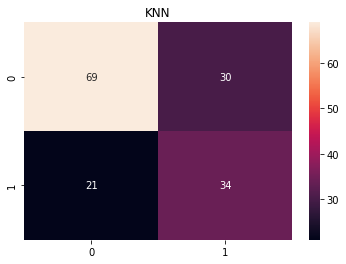

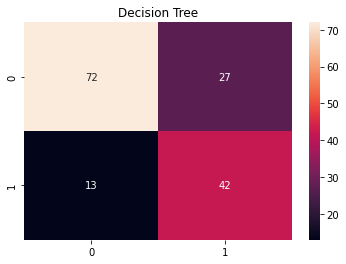

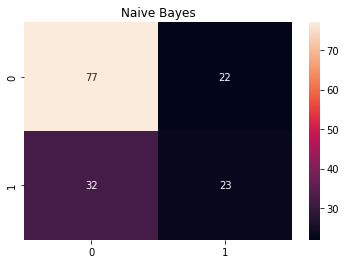

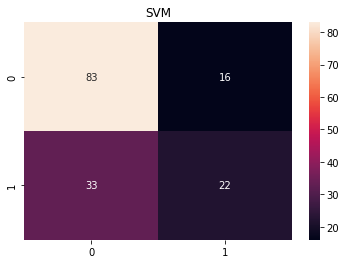

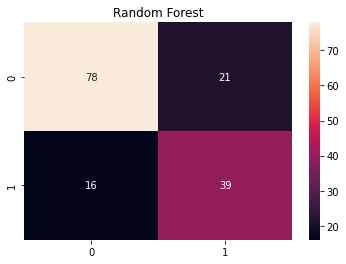

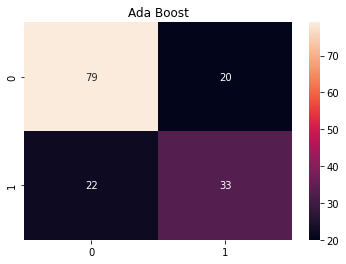

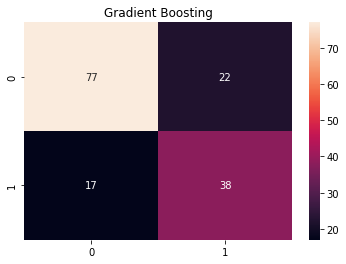

In [20]:
for i in range(len(algos)):
    ax = plt.axes()
    sns.heatmap(cf_matrix[i], annot=True, ax=ax)
    # sns.heatmap(data, ax = ax)

    ax.set_title(algos[i])
    plt.show()


In [21]:
fpers[0], tpers[0]



(array([0.        , 0.06060606, 0.3030303 , 0.52525253, 1.        ]),
 array([0.        , 0.25454545, 0.61818182, 0.8       , 1.        ]))

In [55]:
import matplotlib.pyplot as plt

def roc_plot(fpers,tpers,algo):
    
    plt.plot(fpers, tpers, linestyle='--',label=algo)
    

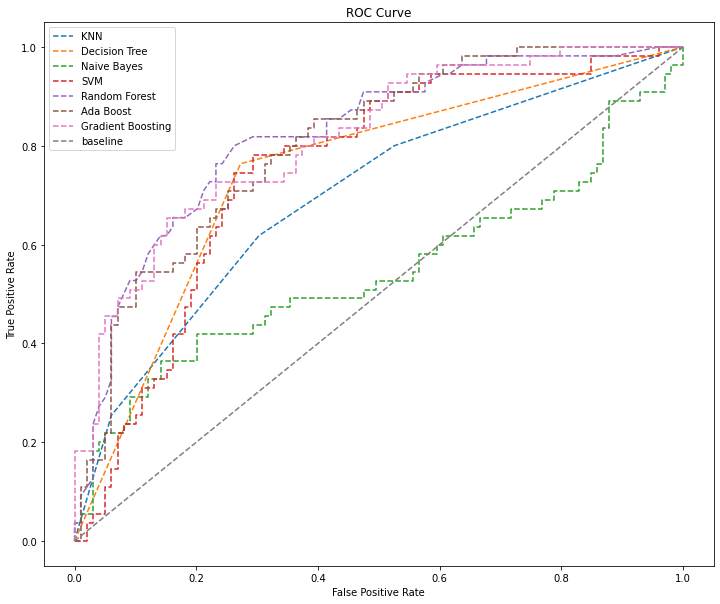

In [58]:
plt.figure(figsize=(12,10))
for i in range(len(algo)):
    roc_plot(fpers[i],tpers[i],algos[i])


plt.plot([0,1], [0,1], linestyle='--',label='baseline')
# plt.plot(fpr, rf_tpr, marker='.', label='Random Forest (AUROC = %0.3f)' % rf_auc)
# plt.plot(nb_fpr, nb_tpr, marker='.', label='Naive Bayes (AUROC = %0.3f)' % nb_auc)

# Title
plt.title('ROC Curve')
# Axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='upper left')
plt.show()